#                     Titanic: Machine Learning from Disaster


## Overview

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.


## Data Dictionary

VariableDefinitionKey survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


## Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



In [42]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print('Done')

Done


In [43]:
# Creating DataFrame and Displaying first 5 Rows

train_df=pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# Displaying the shape of DataFrame

train_df.shape

(891, 12)

In [45]:
# Checking the Data-types of all the columns present in train_df

train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
# Checking the numbers of missing values of each columns present in train_df

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
# Filling the NAN values by replacing with Zero

train_df['Age'].fillna(0,inplace=True)
train_df['Cabin'].fillna(0,inplace=True)
train_df['Embarked'].fillna(0,inplace=True)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [48]:
# Groupby on the Basis of Survived 

train_df.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342,342,342,342


In [49]:
# Pivot table Function 

def pivot_feature(feature):
    pivot=train_df.pivot_table(index=feature,columns='Survived',values='PassengerId',aggfunc='count',margins=True)
    pivot.columns=['Dead','Survived','Total']
    return pivot

In [50]:
pivot_feature('Pclass')

,Dead,Survived,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [51]:
pivot_feature('Sex')

,Dead,Survived,Total
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [52]:
# Changing the datatype of column "age"

train_df[['Age']]=train_df[['Age']].astype('int')

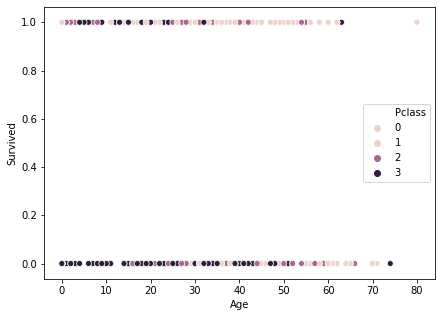

In [53]:
# Ploting Graph 

plt.figure(figsize=(7,5))
sns.scatterplot(x='Age',y='Survived',data=train_df,hue='Pclass')

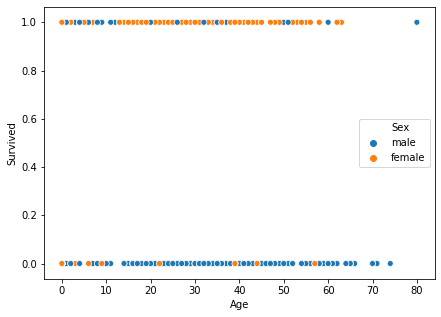

In [54]:
# Ploting Graph

plt.figure(figsize=(7,5))
sns.scatterplot(x='Age',y='Survived',data=train_df,hue='Sex')

In [55]:
# Creating dummy variable for column 'Sex'

dummies=pd.get_dummies(train_df['Sex'])
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [56]:
# Joining train_df and dummies

train_df=pd.concat([train_df,dummies],axis=1)
train_df.drop('Sex', axis=1,inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,0,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,S,0,1


In [57]:
# Creating 'X'and 'y' variable for machine learning model

x=train_df[['female','male','Pclass','Age','SibSp','Parch']]
y=train_df['Survived']

In [58]:
# Importing machine learning models libraries

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [59]:
# Creating variables for train_test_split process

train_x,check_x,train_y,check_y=train_test_split(x,y,test_size=0.3,random_state=4)
print('train_x shape=',train_x.shape)
print('train_y shape=',train_y.shape)
print('check_x shape=',check_x.shape)
print('check_y shape=',check_y.shape)

train_x shape= (623, 6)
train_y shape= (623,)
check_x shape= (268, 6)
check_y shape= (268,)


In [60]:
# machine learning model libraries


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [61]:
# GridSearchCV for Choosing perfect model with best parameters

from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(train_x, train_y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.778491,{'n_estimators': 10}
1,logistic_regression,0.767255,{'C': 1}


In [62]:
# Best for Machine learing is Random Forest

model=RandomForestClassifier(n_estimators=10)
model.fit(train_x,train_y)
output=model.predict(check_x)
output[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [63]:
model.predict_proba(check_x)[:5]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.32844108, 0.67155892],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [64]:
score=cross_val_score(model,train_x,train_y,cv=4)
print('Score=',score)
print('Score mean=',score.mean())

Score= [0.78846154 0.76923077 0.78205128 0.76129032]
Score mean= 0.7752584780810587


In [65]:
predict=cross_val_predict(model,train_x,train_y,cv=4)
print('Predicts=',predict[0:5])

Predicts= [1 0 0 0 1]


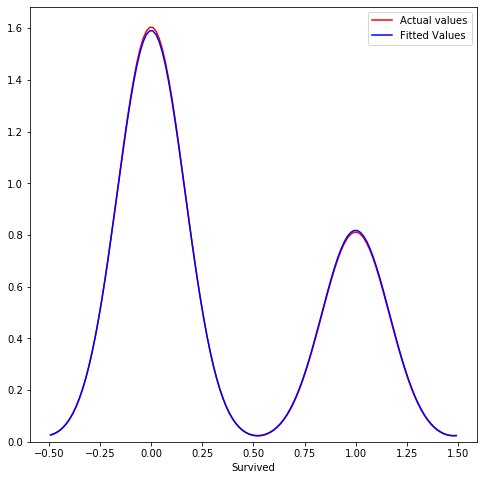

In [66]:
# Ploting the actual vs fitting value

plt.figure(figsize=(8,8))
ax1=sns.distplot(check_y,hist=False,color='r',label='Actual values')
sns.distplot(output,hist=False,color='b',label='Fitted Values',ax=ax1)

In [67]:
# Detail Performance of model

r=model.score(train_x,train_y)
print('R-square=',r)
mse=mean_squared_error(check_y,output)
print('Mean Squared Error=',mse)
print('Accuracy Score=',accuracy_score(check_y, output))
print('\nClassification Report:\n',classification_report(check_y, output))

R-square= 0.9085072231139647
Mean Squared Error= 0.20522388059701493
Accuracy Score= 0.7947761194029851

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       178
           1       0.69      0.70      0.70        90

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.80      0.79      0.80       268



In [68]:
#Creating DataFrame For 'test.csv'

test_df=pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
# Shape of the test_df

test_df.shape

(418, 11)

In [70]:
# Data-types of test_df

test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [71]:
# Checking the NAN values which is present in test_df

test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [72]:
# Filling the NAN values with Zero

test_df['Age'].fillna(0,inplace=True)
test_df['Cabin'].fillna(0,inplace=True)
test_df['Embarked'].fillna(0,inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [73]:
# Changing the data-type of age column

test_df[['Age']]=test_df[['Age']].astype('int')

In [74]:
# Creating dummy variable

dummy=pd.get_dummies(test_df['Sex'])
dummy.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [75]:
# concating the df's

test_df=pd.concat([test_df,dummy],axis=1)
test_df.drop('Sex',axis=1,inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,0,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,0,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,0,Q,0,1
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,0,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,0,S,1,0


In [76]:
# Creating independence variable for model testing

x=test_df[['female','male','Pclass','Age','SibSp','Parch']]

In [77]:
# Result for model training

results=model.predict(x)
results[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [78]:
model.predict_proba(x)[:5]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.39888889, 0.60111111],
       [0.6       , 0.4       ]])

In [79]:
# Saving the result with specific variable 
results=pd.DataFrame({'Survived':results})
file = pd.read_csv('test.csv')
file=pd.concat([file,results],axis=1)
file.to_csv('output.csv', index=False)
print("Submission File is successfully saved!")

Submission File is successfully saved!
